<a href="https://colab.research.google.com/github/MarshaC713/Breast_Cancer_Data_Analysis_Decision_Tree/blob/main/Breast_Cancer_Data_Analysis_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer Data Analysis Decision Tree**

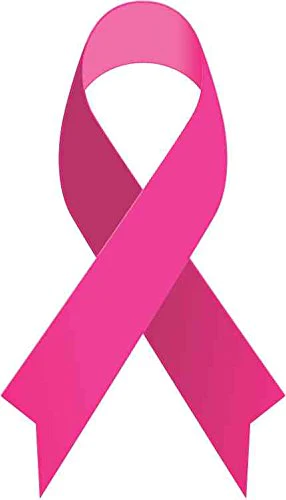

#### **The Data**
UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is a classic binary dataset downloaded from sklearn. 

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### The dataset contains measurements of masses found on breasts suspected to be cancerous. Each row contains measurements for a specific mass, and I have programmed a decision tree to assess each row as a target point to see whether the mass/tumour is benign or malignant.

#### **Data Exploration**

In [5]:
# Getting a better idea of the data and pulling first 10 rows as
# several rows are omitted in the capture ablove
# From this I can derive the datatype of the columns and as you can see, all columns are numeric.
# so no need to change the values into numbers for my model to be able to comprehend the data
#If any columns were strings, I would use the label encoder tool at this point to
# convert the values.

dataset.head(10) #first 10 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
# Getting a better idea of the data and pulling last 10 rows as
# several rows are omitted in the capture above
dataset.tail(10) #last 10 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [9]:
# Returns a tuple representing the dimensionality of the DataFrame,
#(Lists number of rows and columns in a tuple)

dataset.shape

(569, 30)

In [11]:
df = dataset

In [12]:
# The dimensionality of the DataFrame can also be more
# clearly explained in the following way.

print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  569
Number of Columns:  30


In [13]:
# At this point it would be useful to get a summary of the data
# to identify any null values which should be removed
# No null values found.
# summary also provides info on the idex and data type of each column

df.info() #brief summary of info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
# Also returns count of any null values,
# as you can see there are 0 null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [15]:
#Returnsvalues of duplicated data,
# as we can see the output is also zero

df.duplicated().sum()

0

In [16]:
# broad overview of data = statistical overview

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
#lists all columns 
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [18]:
# Searching for covariance between columns

df.cov()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
mean texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
mean perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
mean area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
mean smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
mean compactness,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,...,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
mean concavity,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,...,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
mean concave points,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,...,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
mean symmetry,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,...,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217
mean fractal dimension,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,...,-0.008657,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098


In [19]:
# returns any correlations in the dataframe

df.corr

<bound method DataFrame.corr of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns 
import math
import matplotlib.pyplot as plt


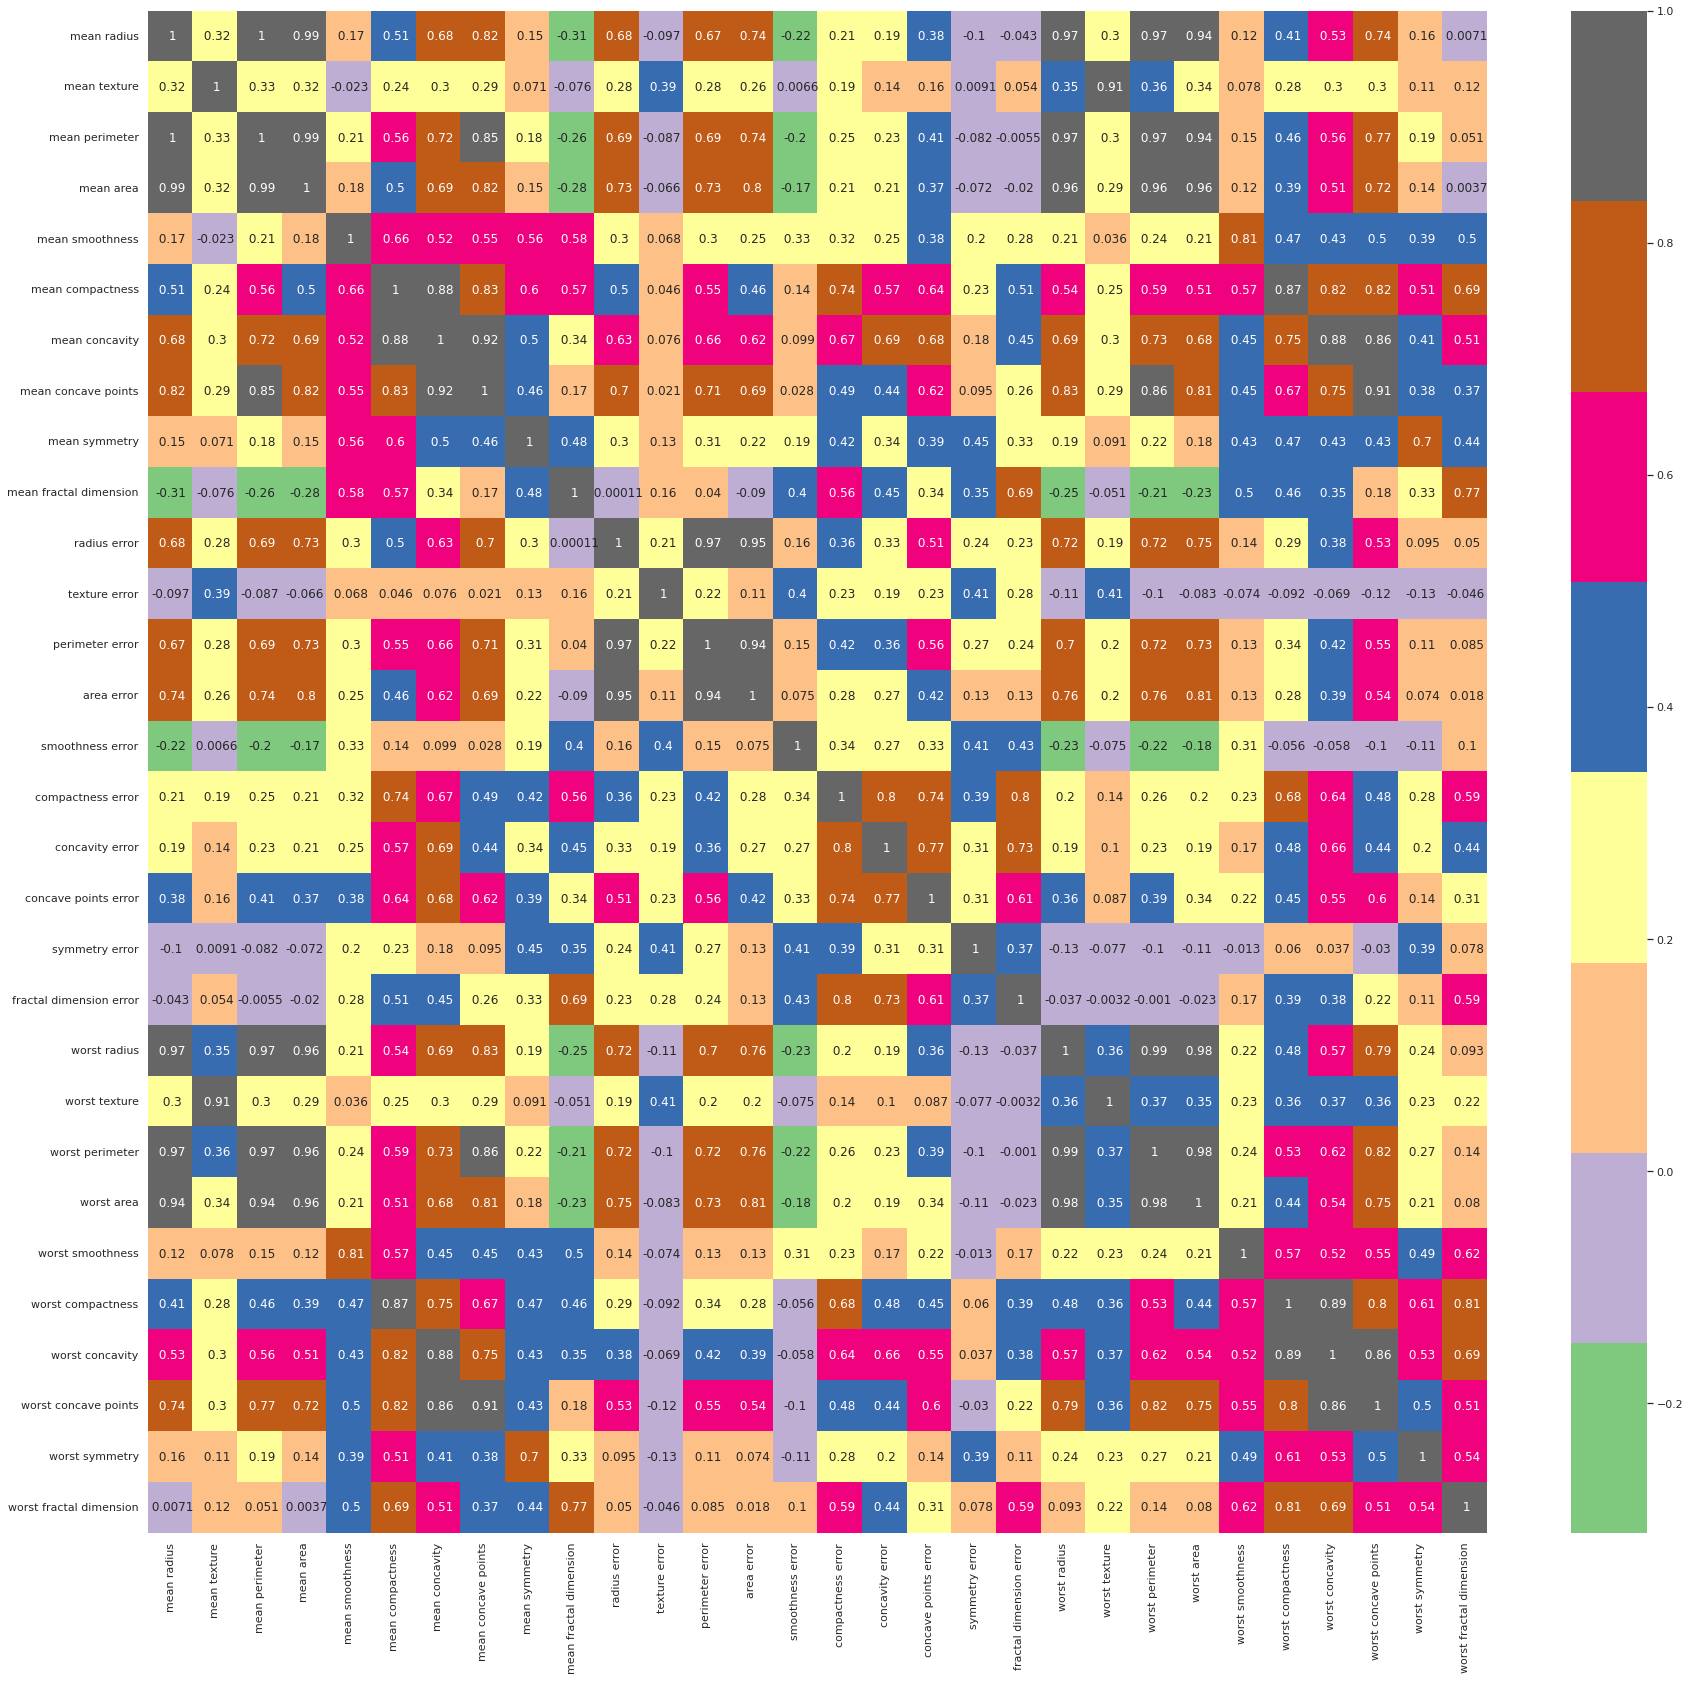

In [24]:
#Further analysing, investigating and depicting correlations through
#the use of heatmap visualizations using seaborn imported as sns.
# the closer the value is to 1 the truer the correlation

plt.figure(figsize=(30,28))
sns.set_theme(style="white")
corr = df.corr()
heatmap =sns.heatmap(corr, annot=True, cmap="Accent", fmt=' .2g') # 2g represents to 2 decimal places

##### The above heatmap shows correlations between features. The closer the number is to 1,  the stronger the correlation. So for example there is a strong correlation between mean radius and mean perimeter, between mean radius and mean area.  However the data is very dense and therefor a better model would be needed to mine the data, to see clearly the key features and relationships needed for this model.

#### **Building and Training The Model**

In [30]:
#Splitting the dataset into 80% training data and 20% test data.
# The training data will be the data fed into the model so that it can make
# its predictions and the test data is the remaing batch of the dataset used to test the accuracy of the predictions
# An 80, 20 split is the standard division as it gives our model enough data to make
# accurate predictions



from sklearn.model_selection import train_test_split
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.20))

In [29]:
#Displays data thats now in independent variable 'X'

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
# Displays data in'target' variable, y 

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
# Importing decision tree classifier to create my model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

##### **Setting the parameters of my model**

In [33]:
# Displays the parameters of the Decision tree classifier, which
# can be manualloy altered according to scope desired for model
# For example I have set max depth to 10

clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
# predictions will return 0 or 1 depending on which feature has the higher probability

predictions =clf.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0])

In [35]:
# Another way to see predictions is to retrieve the probability for each of the classes
# Show the difference between tree that doesn't have stopping criteria and one that does
# the probability will be higher the purer (less paramters set) the decision tree 
clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [36]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.15310,0.11200,0.09823,0.06548,0.2851,0.08763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,11.02,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287


##### **Checking the accuracy of the model**

In [37]:
# Using this accuracy score I can check if these predictions are accurate,
# by comparing them to the actual data
# this performance matrix says this model has an accuracy as displayed below

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8947368421052632

In [38]:
# using the confusion matrix to return the accuracy of the model
# when the class is 0 and is predicted as 0 this happened 39 times,
# and there are 2 wrongly classified instances  
# when the class is 1 and predicted as 1 this happened 63 times
# and there are 10 wrongly classified instances
# Which indicates a very good level of accuracy and low level of confusion

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions, labels=[0,1] )

array([[39,  2],
       [10, 63]])

In [39]:
# My model returns a precision score of .96 or 96%
# which is a very high precision score
from sklearn.metrics import precision_score
precision_score (y_test, predictions)

0.9692307692307692

In [40]:
# Calculating the recall score
# Which is also high at 0.86

from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.863013698630137

In [41]:
# The classification report is a great tool to compare features with the target feature below
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant','benign',]))

              precision    recall  f1-score   support

   malignant       0.80      0.95      0.87        41
      benign       0.97      0.86      0.91        73

    accuracy                           0.89       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114



In [42]:
X.shape[0]

569

##### **Determing the importance of each feature**

In [43]:
# Returns the names of all the feature columns
feature_names =X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [44]:
# Gives the weighted importance of each feature named above
# as we can see, worst concave points and mean texture and worst perimeter 
# are scored with the highest importance, however, because of the amount of data 
# reading the feature importances could lead to error

clf.feature_importances_

array([0.        , 0.07655004, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00869986, 0.        , 0.01166602, 0.        ,
       0.        , 0.        , 0.00780757, 0.        , 0.00769907,
       0.        , 0.02466297, 0.71196732, 0.        , 0.01759946,
       0.00876436, 0.        , 0.12458334, 0.        , 0.        ])

In [45]:
#returns feature names adjacent to feature importance
# so that its easier to identify the weighted importances of each feature
df2 = pd.DataFrame({'Feature_names':X.columns,'Importances':clf.feature_importances_})
df2

,Feature_names,Importances
0,mean radius,0.000000
1,mean texture,0.076550
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.000000
8,mean symmetry,0.000000
9,mean fractal dimension,0.000000


In [46]:
# Sorting/ ranking features by importance
plotdata2=df2.sort_values(by=['Importances'], ascending=False)
plotdata3=plotdata2.head(20).reset_index()

In [47]:
# Sorting and ranking the data,  makes it easier to see the 
#features with highest importance to our model
# We can confirm the top 3 features
# yet there are several features which add no value/. have no importance,
# in forming this decision tree according to this dataset
plotdata2

,Feature_names,Importances
22,worst perimeter,0.711967
27,worst concave points,0.124583
1,mean texture,0.076550
21,worst texture,0.024663
24,worst smoothness,0.017599
13,area error,0.011666
25,worst compactness,0.008764
11,texture error,0.008700
17,concave points error,0.007808
19,fractal dimension error,0.007699


In [48]:
# As I have identified features that have no importance above 
#I can now drop these rows as identified by their index


df3 = plotdata2.drop([0, 28, 26, 23,20, 18, 15, 16, 14, 12, 10, 9, 8 ,7 , 6, 5, 4, 3, 2, 29 ])
df3 

,Feature_names,Importances
22,worst perimeter,0.711967
27,worst concave points,0.124583
1,mean texture,0.076550
21,worst texture,0.024663
24,worst smoothness,0.017599
13,area error,0.011666
25,worst compactness,0.008764
11,texture error,0.008700
17,concave points error,0.007808
19,fractal dimension error,0.007699


In [49]:
# The above method of cleaning the data would be suitable if there were only a few
# features to be dropped, but as there are several, the following metod is more suitable
df4 = plotdata2.head(10)
df4 

,Feature_names,Importances
22,worst perimeter,0.711967
27,worst concave points,0.124583
1,mean texture,0.076550
21,worst texture,0.024663
24,worst smoothness,0.017599
13,area error,0.011666
25,worst compactness,0.008764
11,texture error,0.008700
17,concave points error,0.007808
19,fractal dimension error,0.007699


###### **Data visualisations displaying feature importances**

###### Box Plot 🎁

<function matplotlib.pyplot.show(*args, **kw)>

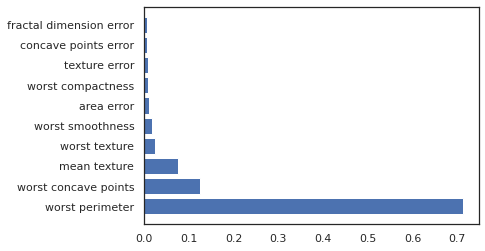

In [50]:
# Horizontal bar chart
plt.barh(df3['Feature_names'],df3['Importances'])
plt.show

###### Decision Tree Plot 🍃

In [51]:
from sklearn import tree
from matplotlib import pyplot as plt

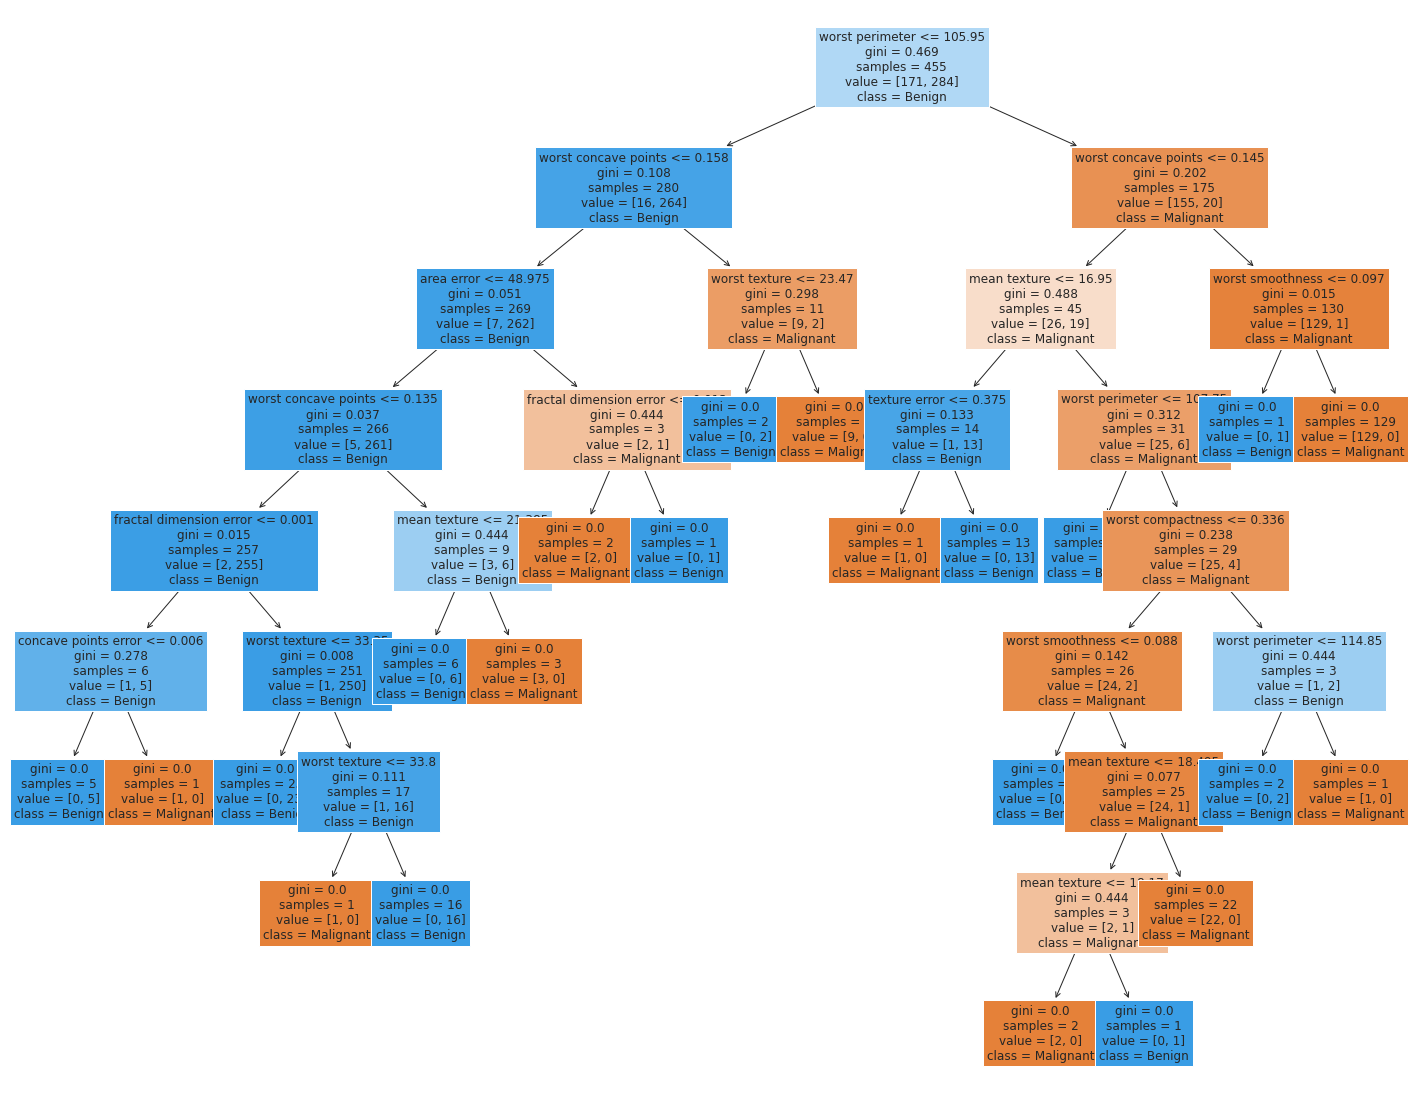

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant',1:'Benign'},
                   filled=True,
                   fontsize=12
    
)

##### **Pruning the tree**
This is done when the tree is quite dense as above, but can also effect accuracy

In [54]:
# Pruning the tree using ccp_alpha, when the ccp_alpha, is set to a value above zero
# this prunes the tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train,y_train)

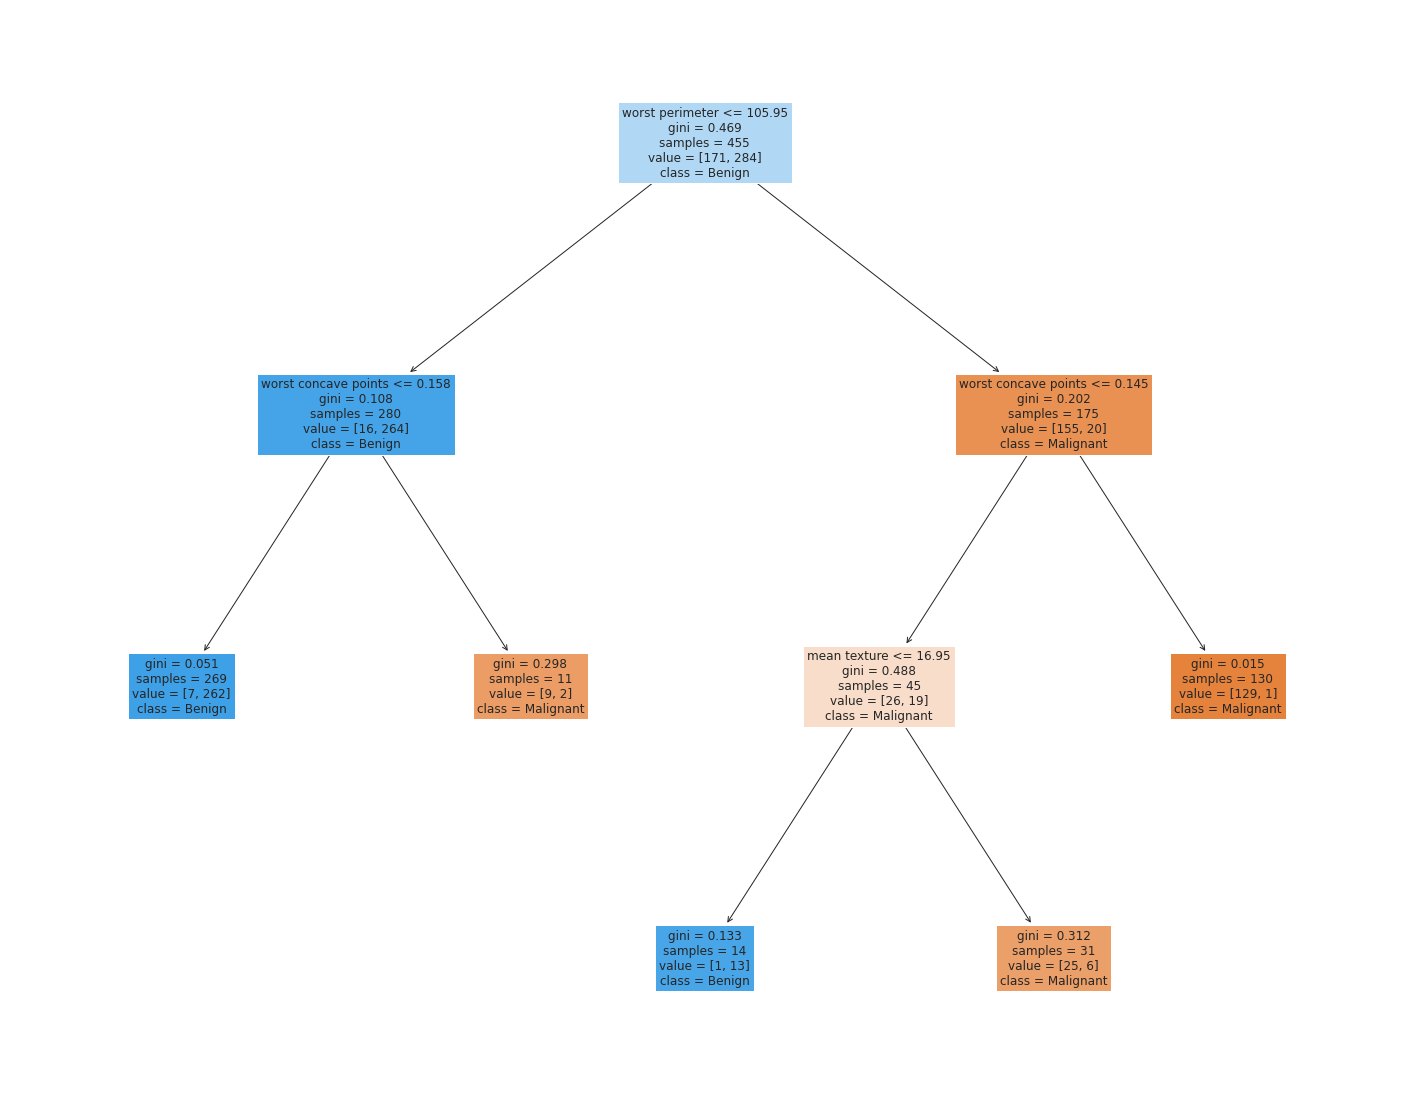

In [55]:
# As displayed below the tree is now pruned and more sparse

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant',1:'Benign'},
                   filled=True,
                   fontsize=12
    
)

In [57]:
# predictions will return 0 or 1 depending on which feature has the higher probability

predictions =clf.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0])

In [58]:
# We can see if the prunning negatively effects the accuracy of the model,
# by re-running accuracy tests.
# Previous accuracy score was 0.89, new accuracy score is higher at 0.93,
# So pruning the model improved the accuracy in this case, implying the tree may 
# have previously been overfitted to the dataset

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.9385964912280702